<a href="https://colab.research.google.com/github/sidraalyousef/dsa210/blob/main/dsaproject_russia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# loading russia data from drive
file_path = '/content/drive/My Drive/russia_data.xlsx'
data = pd.read_excel(file_path)

# display first few rows to verify
# print("Data Preview:\n", data.head())
# print("info: \n", data.info())

Mounted at /content/drive


# Part 0: Data Cleaning

In [5]:
# data cleaning:
numeric_columns = ['inflation', 'exchangerate', 'unemploymentrate', 'povertyrate']
for col in numeric_columns:
  data[col] = pd.to_numeric(data[col], errors='coerce')


#Part 1: Data Exploration

##Explaining the data:
1. inflation: percentage
2. exchange rate: USD to Russian Ruble
imported, from every other country in the world
4. unemployment rate: percentage
5. poverty rate: percentage

In [ ]:
print("Data Shape:", data.shape)

# Identify attribute types
print("\nAttribute Types:")
print(data.dtypes)


# Step 2: Summary Statistics (Slides: Pages 6, 23–34)
print("\nSummary Statistics:")
print(data.describe())

Data Shape: (25, 7)

Attribute Types:
year                        int64
inflation                 float64
exchangerate              float64
unemploymentrate          float64
povertyrate               float64
targetedsanctions           int64
comprehensivesanctions      int64
dtype: object

Summary Statistics:
              year  inflation  exchangerate  unemploymentrate  povertyrate  \
count    25.000000  25.000000     25.000000         25.000000    25.000000   
mean   2012.000000   9.638800     46.104210          6.164600    14.512000   
std       7.359801   4.441038     21.620809          1.848558     5.533935   
min    2000.000000   2.520000     24.852875          2.516000     7.200000   
25%    2006.000000   6.450000     29.168525          5.158000    11.600000   
50%    2012.000000   9.000000     31.740358          5.767000    13.000000   
75%    2018.000000  11.920000     64.737658          7.358000    15.200000   
max    2024.000000  20.200000     92.850000         10.558000    

#Part 2: Visualizations:
visualizations:
1. inflation, unemployment rate, poverty rate, from 2000 to 2024 (line chart)
2. exchange rate: (area chart)

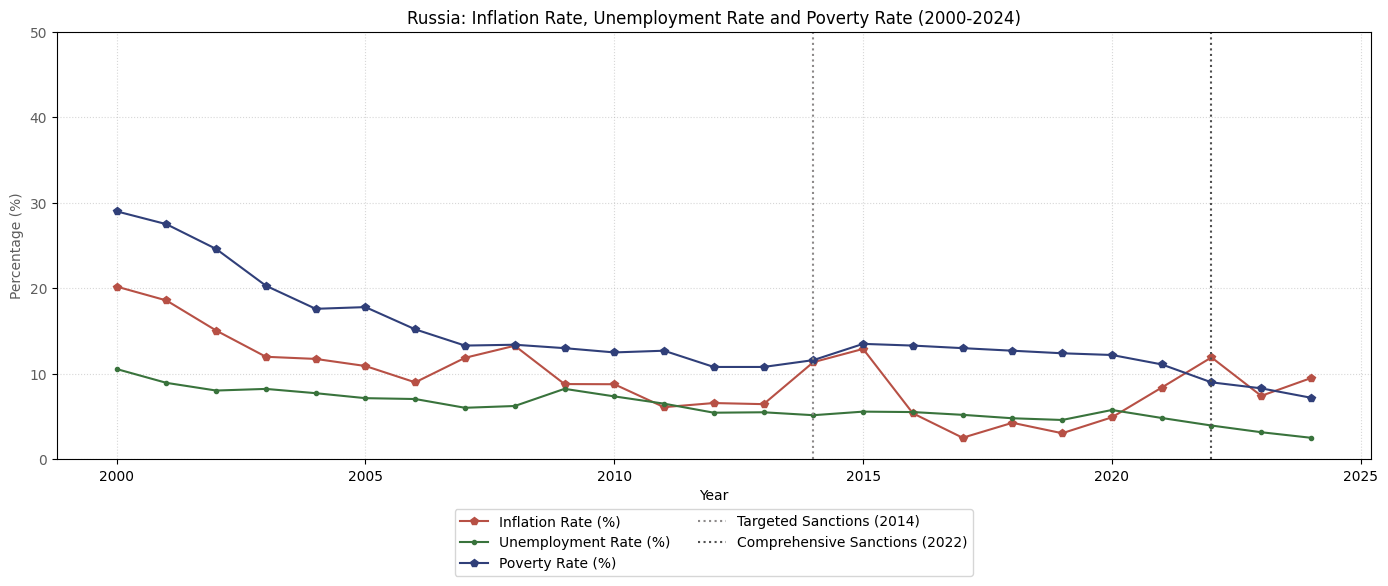

In [ ]:
# 2.1. creating the line chart for inflation, unemployment rate, poverty rate (percentages)
plt.figure(figsize=(14, 6))

# plotting all metrics on a single y-axis
ax = plt.gca()
ax.plot(data['year'], data['inflation'], color='#b75045', label='Inflation Rate (%)', marker='p')
ax.plot(data['year'], data['unemploymentrate'], color='#39733c', label='Unemployment Rate (%)', marker='.')
ax.plot(data['year'], data['povertyrate'], color='#303f79', label='Poverty Rate (%)', marker='p')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)', color='#5d5d5d')
ax.tick_params(axis='y', labelcolor='#5d5d5d')

# range
ax.set_ylim(0, 50)


#adding liness for sanction events
plt.axvline(x=2014, color='#8c8989', linestyle='dotted', label='Targeted Sanctions (2014)')
plt.axvline(x=2022, color='#4f4f4f', linestyle='dotted', label='Comprehensive Sanctions (2022)')


#title and legend
plt.title('Russia: Inflation Rate, Unemployment Rate and Poverty Rate (2000-2024)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.grid(True, linestyle='dotted', alpha=0.5)
plt.tight_layout()

plt.show()

plt.savefig('russia_inflation_exchange_plot.png', dpi=300, bbox_inches='tight')
plt.close()

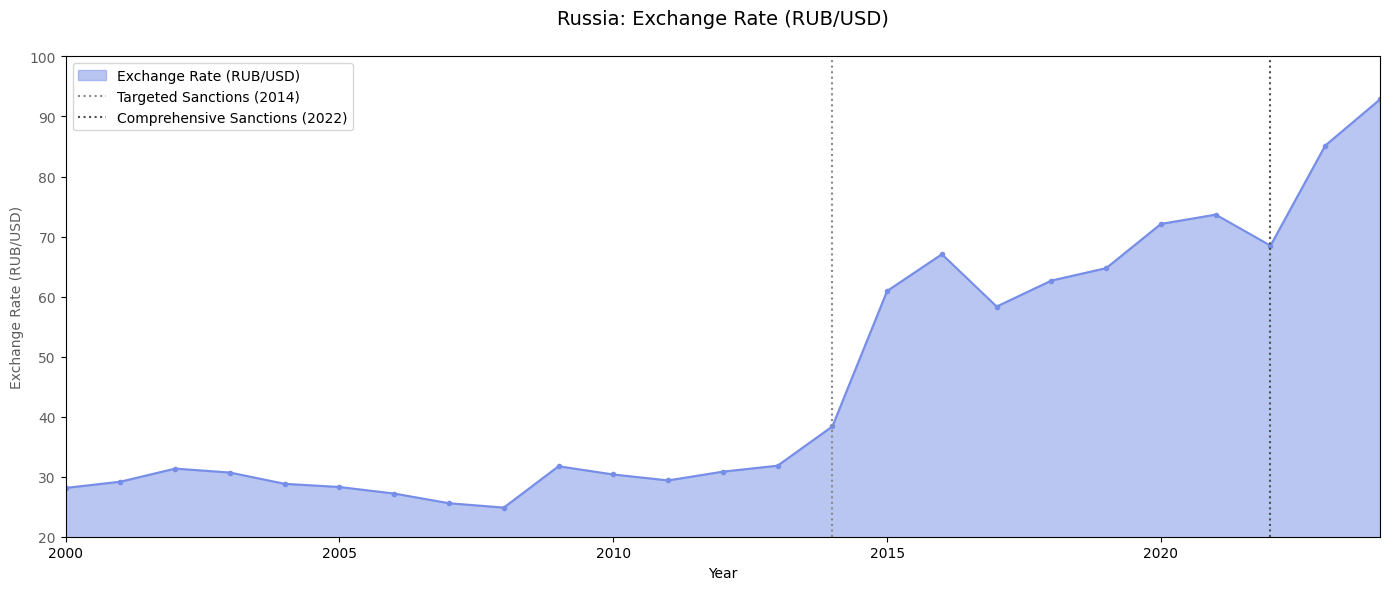

In [ ]:
# 2.2: russia exchnge rate varea chart
plt.figure(figsize=(14, 6))
ax = plt.gca()

# area chart, fill between x axis and exchange rate
ax.fill_between(data['year'], data['exchangerate'], color='#768ee7', alpha=0.5, label='Exchange Rate (RUB/USD)')
ax.plot(data['year'], data['exchangerate'], color='#768ee7', marker='.')

#x axis: year, y axis: exchange rate
ax.set_xlabel('Year')
ax.set_ylabel('Exchange Rate (RUB/USD)', color='#5d5d5d')
ax.tick_params(axis='y', labelcolor='#5d5d5d')
ax.set_ylim(20, 100)  # min:24 max:92
ax.set_xlim(2000, 2024)

#add vertical lines for sanction events
plt.axvline(x=2014, color='#8c8989', linestyle='dotted', label='Targeted Sanctions (2014)')
plt.axvline(x=2022, color='#4f4f4f', linestyle='dotted', label='Comprehensive Sanctions (2022)')

#title and legend
plt.title('Russia: Exchange Rate (RUB/USD)', fontsize=14, y=1.05)
plt.legend()

plt.tight_layout()
plt.show()

plt.savefig('russia_exchange_rate_plot.png', dpi=300, bbox_inches='tight')
plt.close()

#Part 3: Correlation Analysis

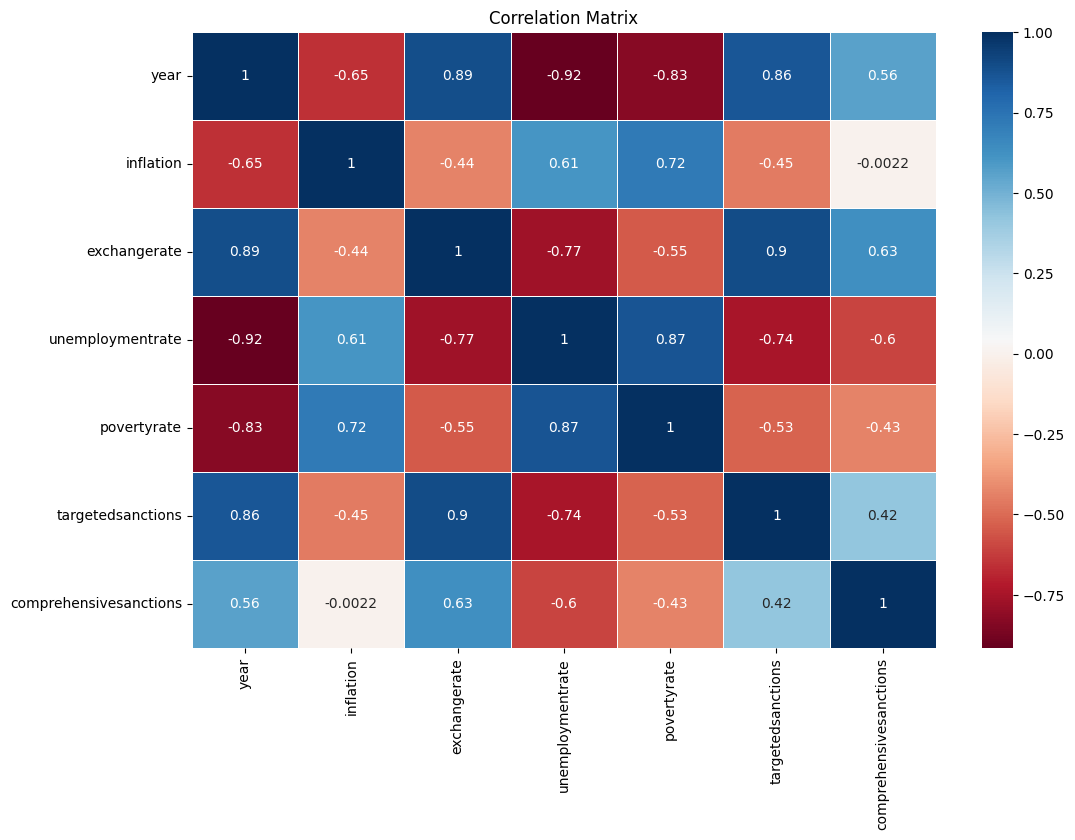

In [ ]:
# 3. Correlation Analysis, matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#Part 4: Hypothesis Testing

##Effect of comprehensive sanctions on attributes
1. Relationship between comprehensive sanctions and inflation: not significant
2. Relationship between comprehensive sanctions and exchange rate: significant
3. Relationship between comprehensive sanctions and povertyt rate: significant
4. Relationship between comprehensive sanctions and unemployment rate: significant

##Effect of targeted sanctions on attributes
5. Relationship between targeted sanctions and inflation: significant
6. Relationship between targeted sanctions and exchange rate: significant
7. Relationship between targeted sanctions and unemployment rate: significant
8. Relationship between targeted sanctions and poverty rate: significant

##Relationships between attributes
9. Relationship between inflation and ipoverty rate: significant
10. Relationship between inflation and unemployment rate: significant

In [ ]:
# Hypothesis Testing 1: Pearson correlation between comprehensive sanctions and inflation
correlation, p_value = pearsonr(data['comprehensivesanctions'], data['inflation'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Comprehensive sanctions affect inflation).")
else:
    print("No significant relationship: Fail to reject H₀ (Comprehensive sanctions do not affect inflation).")

Correlation: -0.0021612314367044643
P-Value: 0.9918195150996262
No significant relationship: Fail to reject H₀ (Comprehensive sanctions do not affect inflation).


In [ ]:
# Hypothesis Testing 2: Pearson correlation between comprehensive sanctions and exchange rate
correlation, p_value = pearsonr(data['comprehensivesanctions'], data['exchangerate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Comprehensive sanctions affect exchange rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Comprehensive sanctions do not affect exchange rate).")

Correlation: 0.6286150794027497
P-Value: 0.0007643064799203758
Significant relationship: Reject H₀ (Comprehensive sanctions affect exchange rate).


In [ ]:
# Hypothesis Testing 3: Pearson correlation between comprehensive sanctions and poverty rate
correlation, p_value = pearsonr(data['comprehensivesanctions'], data['povertyrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (comprehensivesanctions affect poverty rate).")
else:
    print("No significant relationship: Fail to reject H₀ (comprehensivesanctions do not affect poverty rate).")

Correlation: -0.43214956596738296
P-Value: 0.030978737632081706
Significant relationship: Reject H₀ (comprehensivesanctions affect unemployment rate).


In [ ]:
# Hypothesis Testing 4: Pearson correlation between comprehensive sanctions and unemployment rate
correlation, p_value = pearsonr(data['comprehensivesanctions'], data['unemploymentrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Targeted sanctions affect unemployment rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect unemployment rate).")

Correlation: -0.602188297492582
P-Value: 0.0014468856645876845
Significant relationship: Reject H₀ (Targeted sanctions affect unemployment rate).


In [ ]:
# Hypothesis Testing 5: Pearson correlation between targeted sanctions and inflation
correlation, p_value = pearsonr(data['targetedsanctions'], data['inflation'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Targeted sanctions affect inflation).")
else:
    print("No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect inflation).")

Correlation: -0.4518064127006567
P-Value: 0.02337264010031824
Significant relationship: Reject H₀ (Targeted sanctions affect inflation).


In [ ]:
# Hypothesis Testing 6: Pearson correlation between targeted sanctions and exchange rate
correlation, p_value = pearsonr(data['targetedsanctions'], data['exchangerate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Targeted sanctions affect exchange rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect exchange rate).")

Correlation: 0.9024064882250966
P-Value: 7.037242605576093e-10
Significant relationship: Reject H₀ (Targeted sanctions affect exchange rate).


In [ ]:
# Hypothesis Testing 7: Pearson correlation between targeted sanctions and unemployment rate
correlation, p_value = pearsonr(data['targetedsanctions'], data['unemploymentrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Targeted sanctions affect unemployment rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect unemployment rate).")

Correlation: -0.743869698203163
P-Value: 2.0251775311691973e-05
Significant relationship: Reject H₀ (Targeted sanctions affect unemployment rate).


In [ ]:
# Hypothesis Testing 8: Pearson correlation between targeted sanctions and poverty rate
correlation, p_value = pearsonr(data['targetedsanctions'], data['povertyrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Targeted sanctions affect poverty rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Targeted sanctions do not affect poverty rate).")

Correlation: -0.5250954004740921
P-Value: 0.007034011459116775
Significant relationship: Reject H₀ (Targeted sanctions affect poverty rate).


In [ ]:
# Hypothesis Testing 9: Pearson correlation between Inflation and poverty rate
correlation, p_value = pearsonr(data['inflation'], data['povertyrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Inflation affects Poverty Rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Inflation do not affect poverty rate).")

Correlation: 0.7157545878627584
P-Value: 5.7545344291016424e-05
Significant relationship: Reject H₀ (Inflation affects Poverty Rate).


In [ ]:
# Hypothesis Testing 10: Pearson correlation between Inflation and unemployment rate
correlation, p_value = pearsonr(data['inflation'], data['unemploymentrate'])
print("Correlation:", correlation)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Significant relationship: Reject H₀ (Inflation affects unemployment Rate).")
else:
    print("No significant relationship: Fail to reject H₀ (Inflation do not affect unemployment rate).")

Correlation: 0.6076771797078353
P-Value: 0.0012730689976073058
Significant relationship: Reject H₀ (Inflation affects unemployment Rate).


#Part 5: Feature Engineering & Machine learning

R² Score: -0.0158
RMSE: 0.0250

Regression Coefficients:
                        Feature  Coefficient
0              exchangerate_log    -0.022465
1              unemploymentrate    -0.007300
2                   povertyrate    -0.007390
3             targetedsanctions     0.022043
4  post_comprehensive_sanctions     0.002941
5                inflation_lag1     0.014188
6             exchangerate_lag1    -0.016693




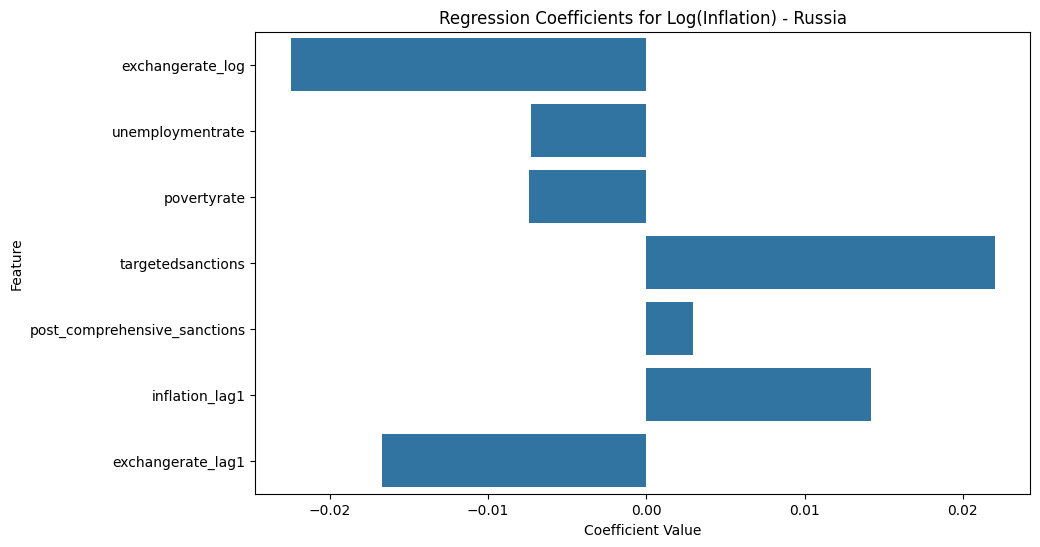

In [16]:
# Feature Engineering
# a. Log-transform inflation rate to handle potential negative values and heteroskedasticity
data['inflation_log'] = np.log(data['inflation'] + 100)
# b. Log-transform exchange rate to reduce skewness
data['exchangerate_log'] = np.log(data['exchangerate'])
# c. Create lagged variables for temporal dependencies
data['inflation_lag1'] = data['inflation'].shift(1)
data['exchangerate_lag1'] = data['exchangerate'].shift(1)
# d. make binary indicator for comprehensive sanctions
data['post_comprehensive_sanctions'] = data['comprehensivesanctions']

#drop rows with NaN values after lagging
data = data.dropna()

# prepare features and target
features = ['exchangerate_log', 'unemploymentrate', 'povertyrate', 'targetedsanctions', 'post_comprehensive_sanctions', 'inflation_lag1', 'exchangerate_lag1']
X = data[features]
y = data['inflation_log']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardization (Z-score)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# prediction and evaluation
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

#interpret coeffs
coef_data = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coef_data)
print('\n')

#plot regression coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_data)
plt.title('Regression Coefficients for Log(Inflation) - Russia')
plt.xlabel('Coefficient Value')
plt.savefig('russia_regression.png', dpi=300, bbox_inches='tight')
plt.show()

K-S Test: Statistic=0.237, p-value=0.937


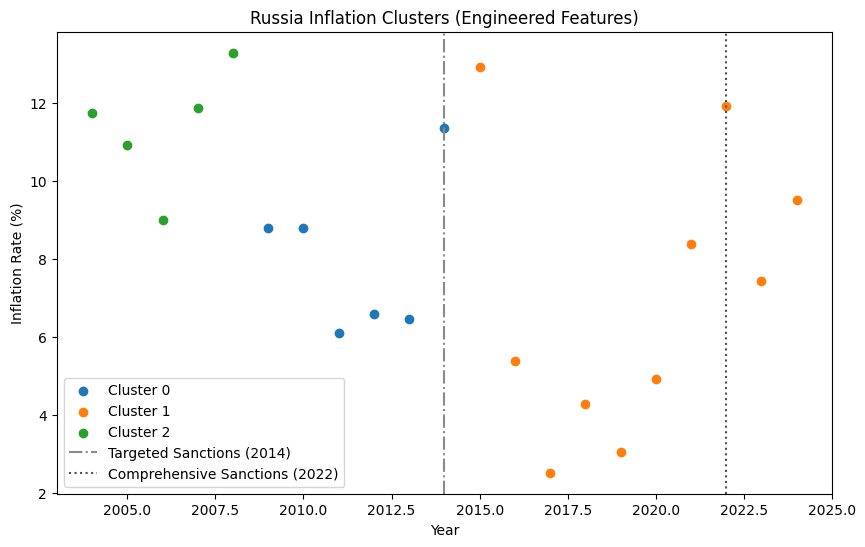

In [15]:

# K-S Test for data shift
pre_2020 = data[data['year'] < 2020]['inflation']
post_2020 = data[data['year'] >= 2020]['inflation']
ks_stat, p_value = ks_2samp(pre_2020, post_2020)
print(f'K-S Test: Statistic={ks_stat:.3f}, p-value={p_value:.3f}')

# K-Means Clustering
X_cluster = data[['inflation', 'povertyrate', 'exchangerate']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_cluster)
plt.figure(figsize=(10, 6))
for cluster in range(3):
    subset = data[data['cluster'] == cluster]
    plt.scatter(subset['year'], subset['inflation'], label=f'Cluster {cluster}')
plt.axvline(x=2014, color='#8c8989', linestyle='dashdot', label='Targeted Sanctions (2014)')
plt.axvline(x=2022, color='#4f4f4f', linestyle='dotted', label='Comprehensive Sanctions (2022)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Russia Inflation Clusters (Engineered Features)')
plt.legend()
plt.savefig('russia_inflation_clusters_engineered_features.png')
plt.show()
plt.close()